In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
plt.rcParams['figure.dpi'] = 140


In [12]:
def dx(a,b,x,y,z):
  return a*x*y - b*x

def dy(a,b,x,y,z):
  return -a*x*y

def dz(a,b,x,y,z):
  return b*x

In [13]:
def plot_all(a, b, n, x_ini, y_ini, z_ini, delta):

  x, y, z, t_axis = [x_ini], [y_ini], [z_ini], [0]
  counter = 0
  while(z[-1] < (0.99*n)):
    counter += 1
    if counter == 3000:
      break

    x.append(x[-1]+dx(a, b, x[-1], y[-1], z[-1])*delta)
    y.append(y[-1]+dy(a, b, x[-2], y[-1], z[-1])*delta)
    z.append(z[-1]+dz(a, b, x[-2], y[-2], z[-1])*delta)
    t_axis.append(t_axis[-1]+delta)

  print('Final value of Z is: ', z[-1])
  print('Final value of X is: ', x[-1])
  print('Final value of Y is: ', y[-1])
  
  print('Threshold value rho : ',b/a)
  print('R is : ',a*y_ini/b)
  
  label1 = 'Plot of x(t)' 
  label2 = 'Plot of y(t)'
  label3 = 'Plot of z(t)'
  label4  = 'Plot for x(t) vs y(t)'
  label5 = 'Plot of x(t),y(t) and z(t)'
  label6 = 'Plot of x(t) and z(t) '

  plt.plot(t_axis, x, color='royalblue', label='x')
  plt.xlabel('Time  in days')
  plt.title(label1)
  plt.ylabel('x(t)')
  plt.grid(which='major', color='#DDDDDD', linewidth=0.8)

  plt.show()

  plt.plot(t_axis, y, color='orangered', label='y')
  plt.xlabel('Time  in days')
  plt.title(label2)
  plt.ylabel('y(t)')
  plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
  plt.show()

  plt.plot(t_axis, z, color='green', label='z')
  plt.xlabel('Time  in days')
  plt.title(label3)
  plt.ylabel('z(t)')
  plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
  plt.show()
  
  plt.plot(t_axis, z, color='green', label='z')
  plt.xlabel('Time  in days')
  plt.title(label3)
  plt.ylabel('z(t) on log-scale')
  plt.yscale('log')
  plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
  plt.show()

  plt.plot(y, x, color='royalblue', label='x')
  plt.xlabel('y(t)')
  plt.title(label4)
  plt.ylabel('x(t)')
  plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
  plt.show()

  plt.plot(t_axis, x, label='x(t)', color='royalblue')
  plt.plot(t_axis, y, label='y(t)', color='orangered')
  plt.plot(t_axis, z, label='z(t)', color='green')
  plt.xlabel('Time  in days')
  plt.title(label5)
  plt.ylabel('x(t), y(t) & z(t)')
  plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
  plt.legend()
  plt.show()
  
  
  plt.plot(t_axis, x, label='x(t)', color='royalblue')
  plt.plot(t_axis, y, label='y(t)', color='orangered')
  plt.xlabel('Time  in days')
  # plt.title(label5)
  # plt.ylabel('x(t), y(t) & z(t)')
  plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
  plt.legend()
  plt.show()

  plt.plot(t_axis, x, label='x(t)', color='royalblue')
  plt.plot(t_axis, y, label='y(t)', color='orangered')
  plt.xlabel('Time  in days')
  # plt.title(label5)
  # plt.ylabel('x(t), y(t) & z(t)')
  plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
  plt.legend()
  plt.yscale('log')
  plt.show()


Final value of Z is:  744.0002487989168
Final value of X is:  0.043950816871073155
Final value of Y is:  18.9558003842098
Threshold value rho :  201.8348623853211
R is :  3.7753636363636365


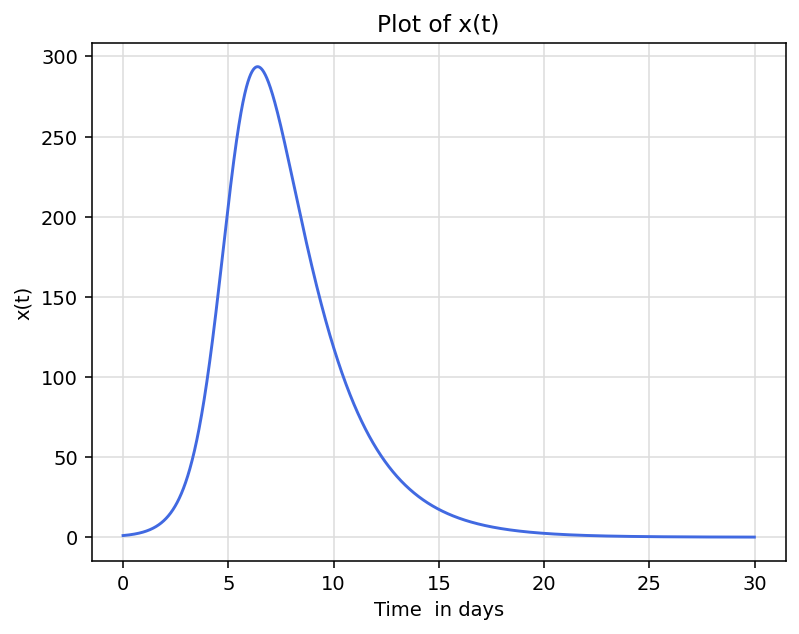

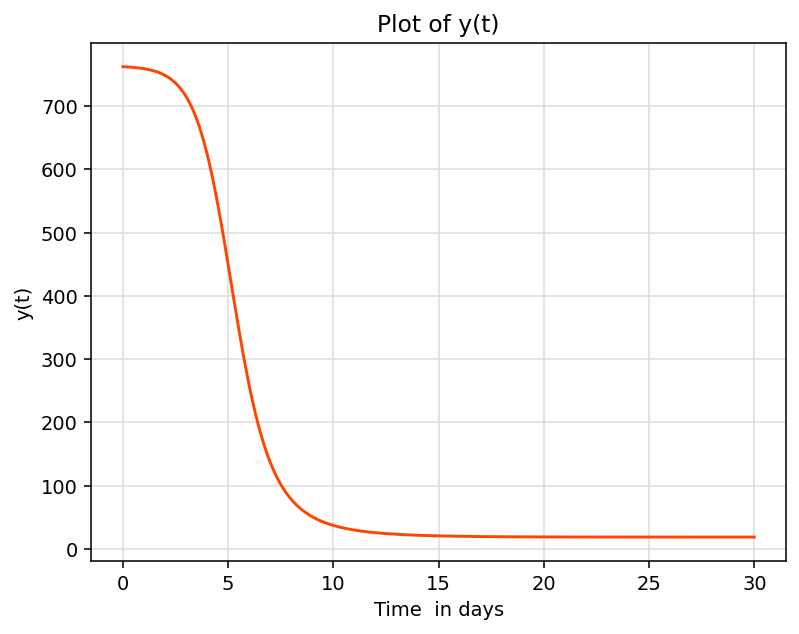

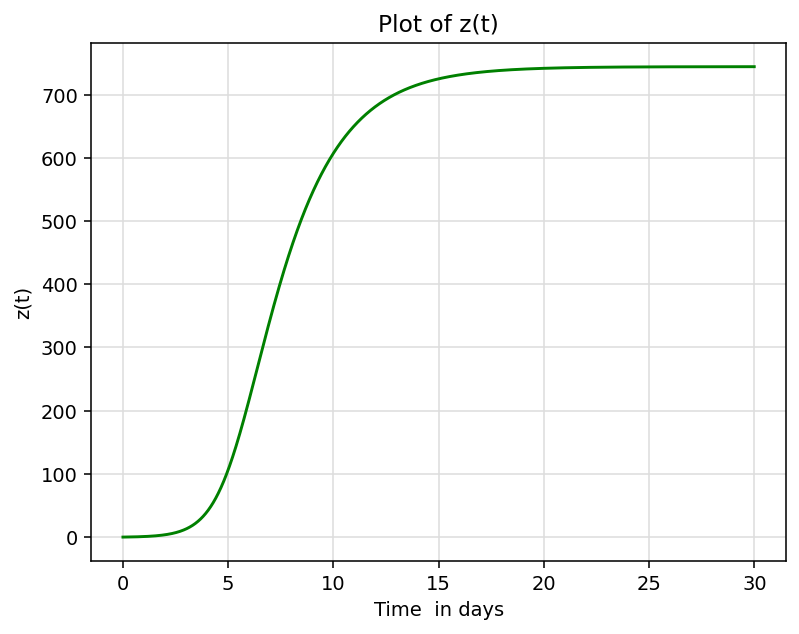

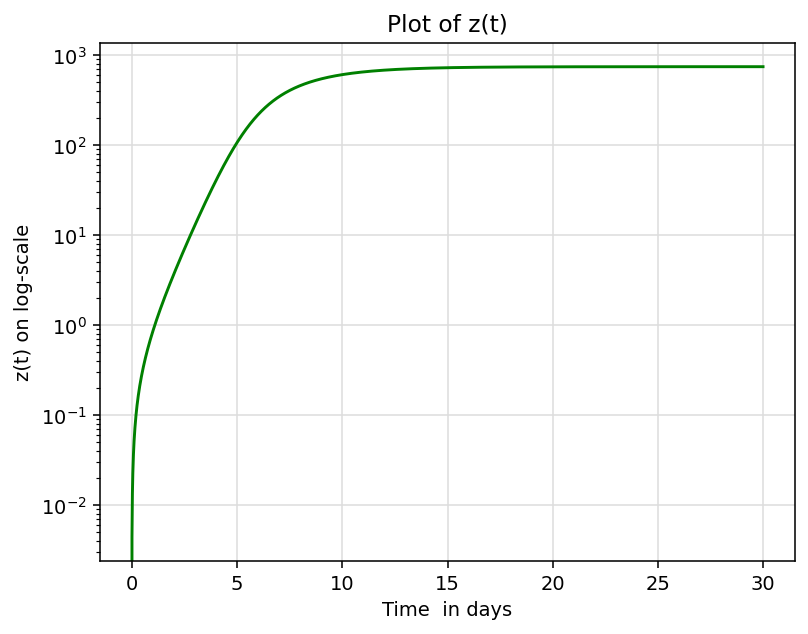

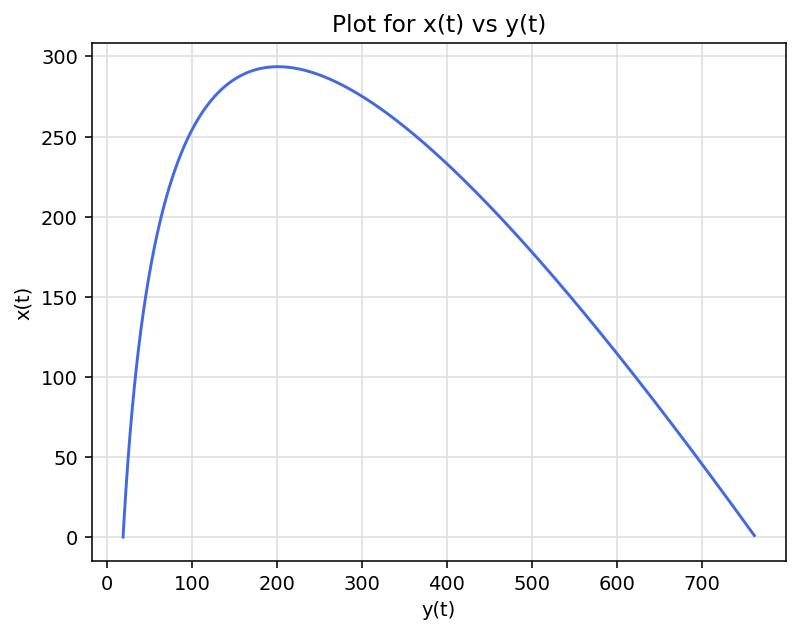

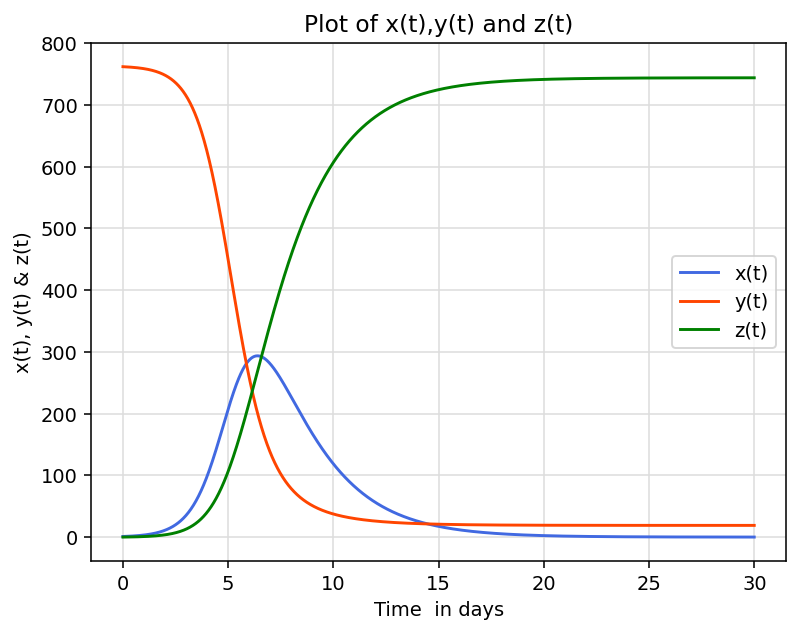

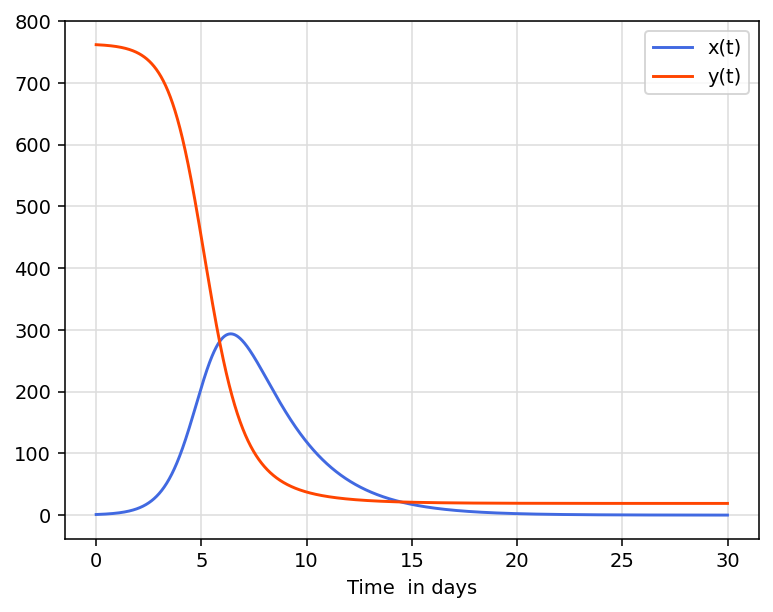

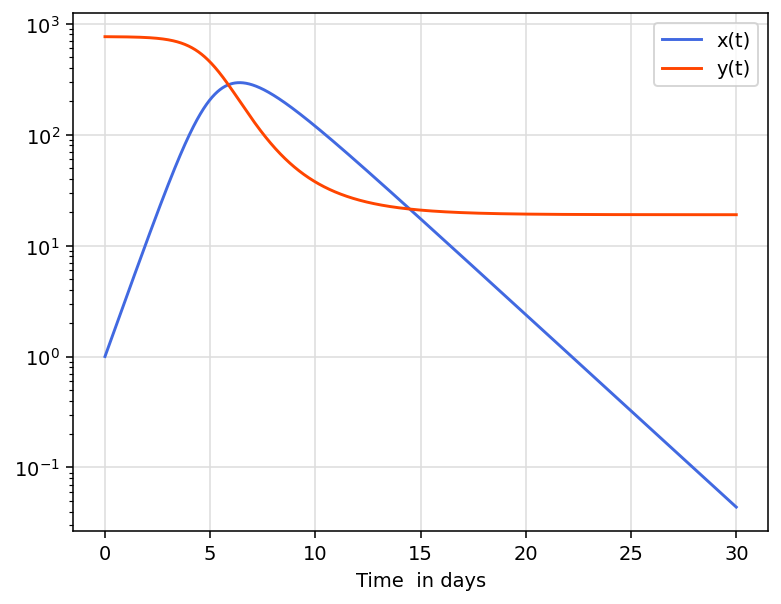

In [14]:

plot_all(a = 2.18*10**-3, b = 0.44, n = 763, x_ini = 1, y_ini = 762, z_ini = 0, delta = 0.01)


In [15]:
def plot_all_2(a, b, n, x_ini, y_ini, z_ini, delta):

  x,y,z,t_axis = [x_ini],[y_ini],[z_ini],[0]
 #print(x[-1],y[-1],z[-1])
  counter = 0
  while(z[-1]<0.99*n):
    counter += 1
    if counter == 30000:
      break
   # print(x[-1],y[-1],z[-1])
    x.append(x[-1]+dx(a,b,x[-1],y[-1],z[-1])*delta)
    y.append(y[-1]+dy(a,b,x[-2],y[-1],z[-1])*delta)
    z.append(z[-1]+dz(a,b,x[-2],y[-2],z[-1])*delta)
    t_axis.append(t_axis[-1]+delta)

  x = list(map(lambda g: g/n, x))
  y = list(map(lambda g: g/n, y))

  return x,y

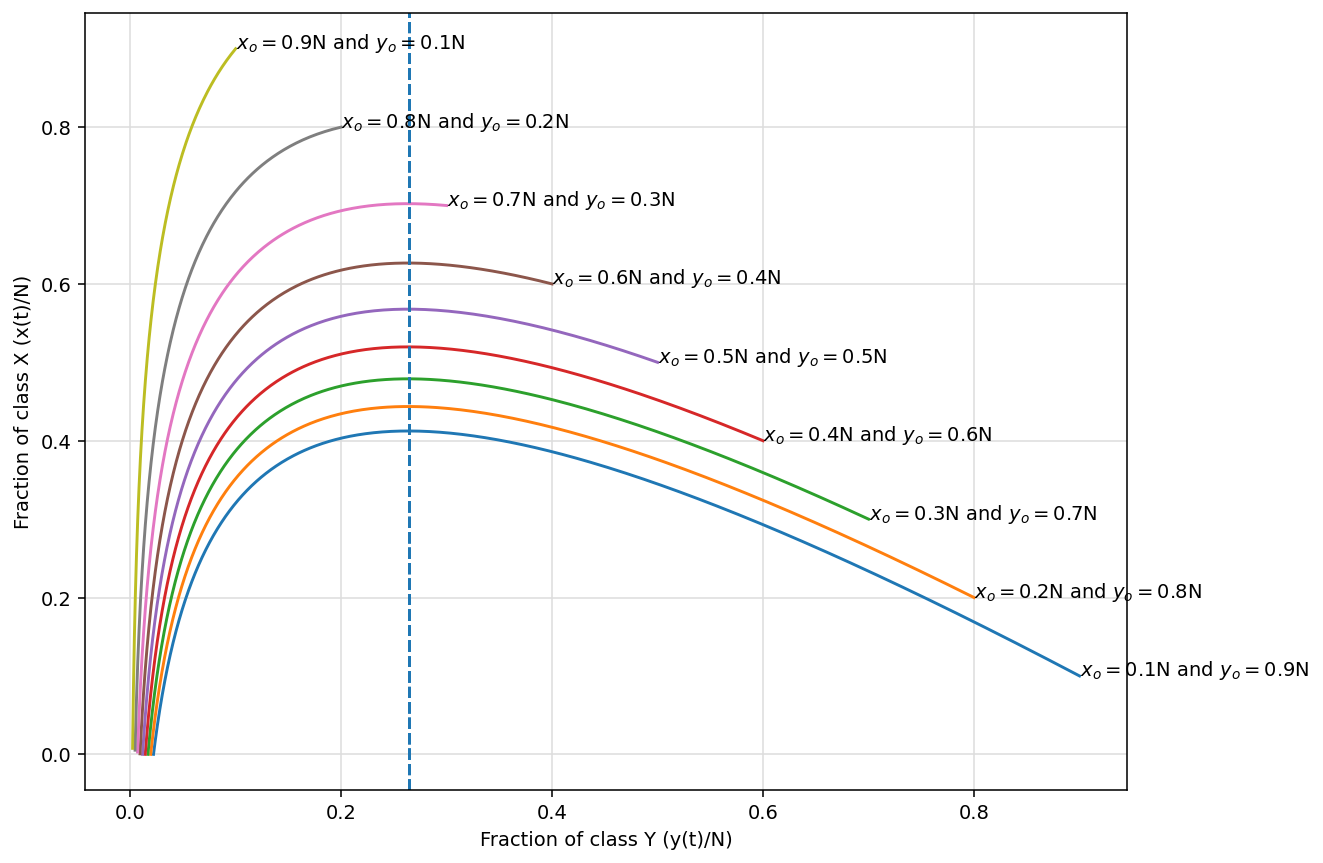

In [16]:
plt.figure(figsize=(9.6,7.2))

for i in range(1,10):
  n= 763
  a = 2.18*10**-3
  b = 0.44
  x_ini = (i/10)*n

  # x,y = plot_all_2(a=a,b=b, n, x_ini, n-x_ini, 0, 0.1) 
  x,y = plot_all_2(a=a,b=b, n=n, x_ini=x_ini, y_ini=n-x_ini, z_ini=0, delta=0.01)

  plt.plot(y,x)
  #plot vertical line with label Threshold

  plt.axvline(x = b/(a*n), ymin=0.0, ymax = 1, linestyle='--',label = 'Threshold B/(A*N)')
  plt.text(x_ini/n, (n-x_ini)/n, '$x_o=$'+str((10-i)/10)+'N and $y_o=$'+str(i/10)+'N')
  plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
  # plt.title('x(t) vs y(t) for N= 1 $0^5$ , A=2x1^0{-6} da$y^{-1} and B=1$0^{-1}$ da$y^{-1}$')
  title = 'x(t) vs y(t) for N = $'
  # plt.title(' alpha equal to $a^{-t}$')
  plt.xlabel('Fraction of class Y (y(t)/N)')
  plt.ylabel('Fraction of class X (x(t)/N)')

In [17]:
# x,y = plot_all_2(10**-5, 10**-1, 10**5, 0.4*10**5, 10**5 - (0.4*10**5), 0, 0.5) 

In [18]:
# plt.plot(y,x)

In [19]:
A = 1e-6; B = 0.333; N=1e6; X0 = 1e5; Y0 = 9e5


def dx(A,B,x,y,z,a,b):
    return A*x*y - B*x - a*x


def dy(A, B, x, y, z, a, b):
    return b*N - A*x*y - b*y


def dz(A, B, x, y, z, a, b):
    return B*x - a*z


def dN(A, B, x, y, z, a, b):
    return (b-a)/N



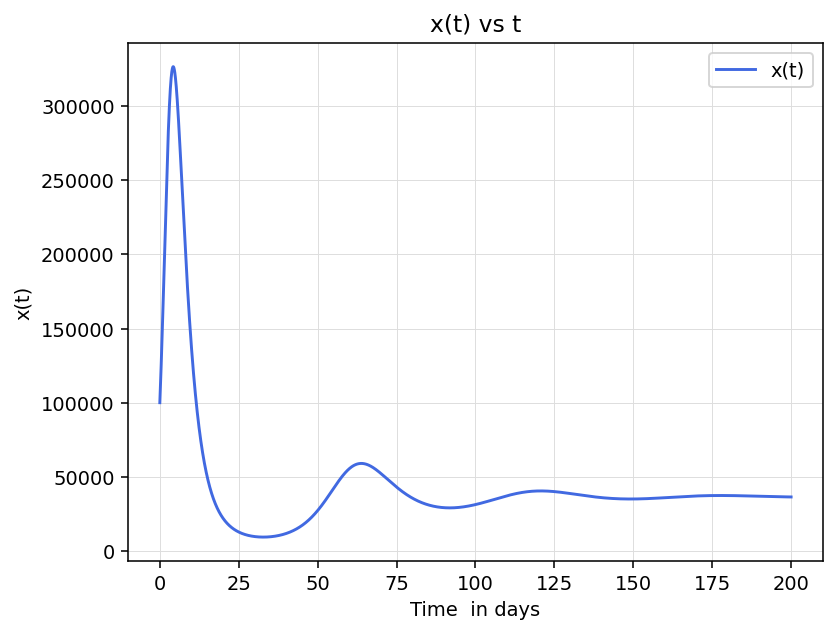

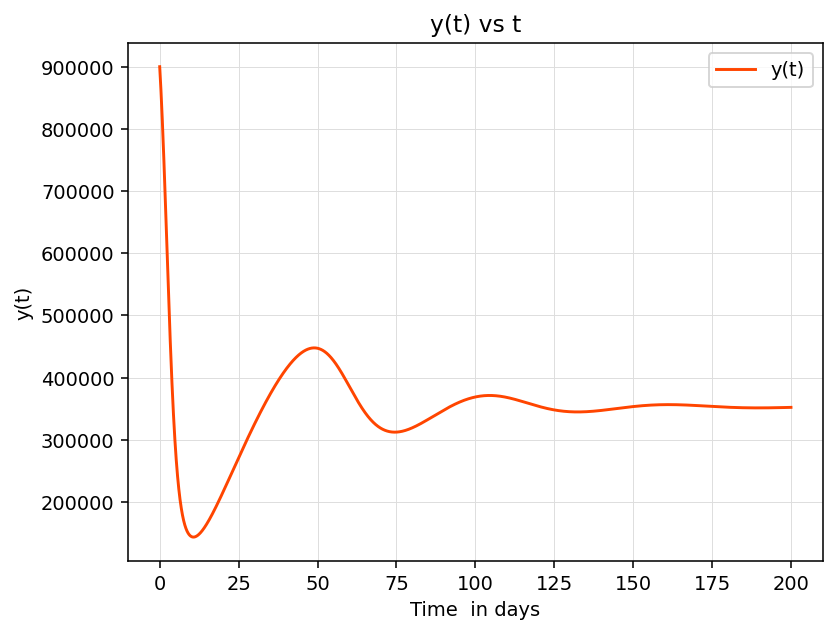

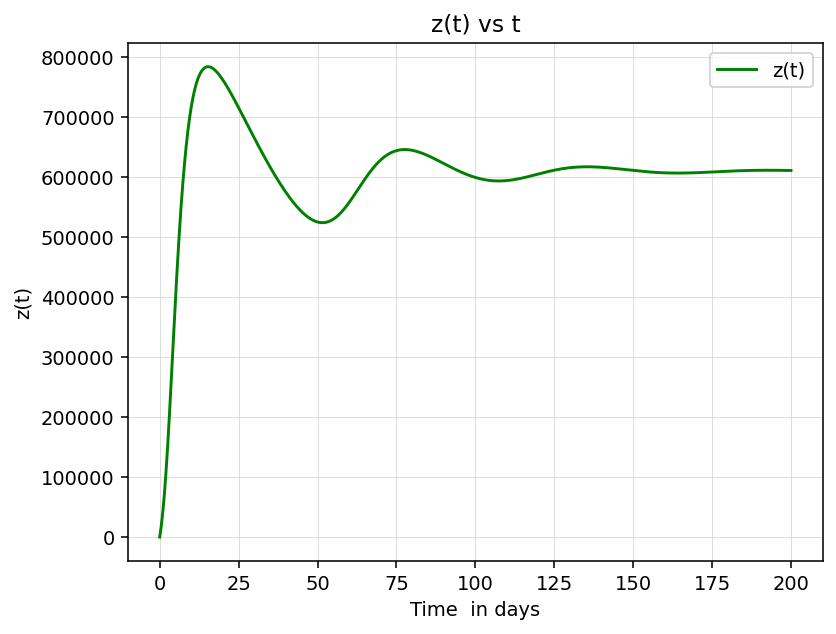

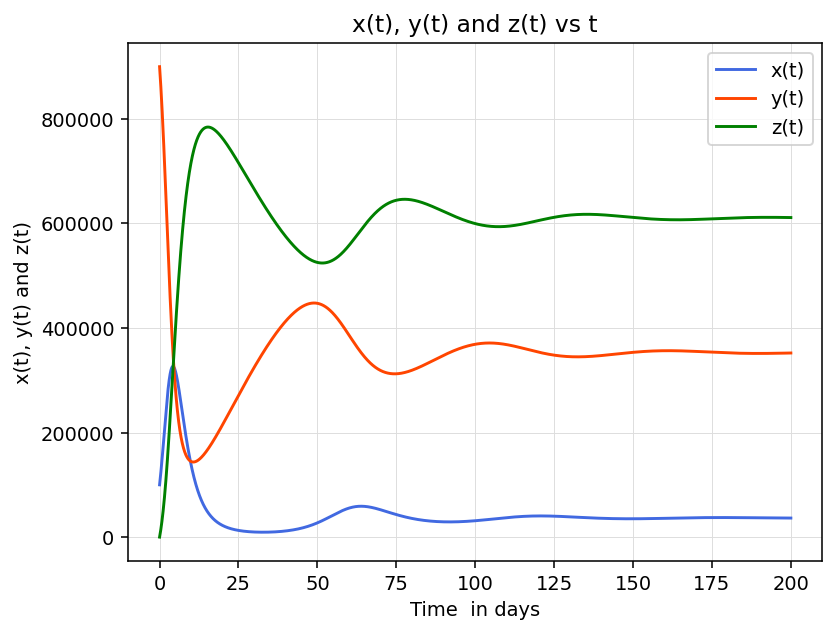

In [20]:
a = 0.02; b= 0.02;
delta = 0.001
x,y,z,t_axis = [X0],[Y0],[0],[0]
counter = 0
while 1:
    counter += 1
    if counter == 200000:
        break
    x.append(x[-1]+dx(A,B,x[-1],y[-1],z[-1],a,b)*delta)
    y.append(y[-1]+dy(A,B,x[-2],y[-1],z[-1],a,b)*delta)
    z.append(z[-1]+dz(A,B,x[-2],y[-2],z[-1],a,b)*delta)
    
    t_axis.append(t_axis[-1]+delta)
    

# Plot x vs t_axis
plt.plot(t_axis, x, label='x(t)', color='royalblue')
plt.xlabel('Time  in days')
plt.title('x(t) vs t')
plt.ylabel('x(t)')
plt.grid(which='major', color='#DDDDDD', linewidth=0.5)
plt.legend()
plt.show()

# Plot y vs t_axis
plt.plot(t_axis, y, label='y(t)', color='orangered')
plt.xlabel('Time  in days')
plt.title('y(t) vs t')
plt.ylabel('y(t)')
plt.grid(which='major', color='#DDDDDD', linewidth=0.5)
plt.legend()
plt.show()

# Plot z vs t_axis
plt.plot(t_axis, z, label='z(t)', color='green')
plt.xlabel('Time  in days')
plt.title('z(t) vs t')
plt.ylabel('z(t)')
plt.grid(which='major', color='#DDDDDD', linewidth=0.5)
plt.legend()
plt.show()
    
    
# Plot x,y,z vs t_axis
plt.plot(t_axis, x, label='x(t)', color='royalblue')
plt.plot(t_axis, y, label='y(t)', color='orangered')
plt.plot(t_axis, z, label='z(t)', color='green')
plt.xlabel('Time  in days')
plt.title('x(t), y(t) and z(t) vs t')
plt.ylabel('x(t), y(t) and z(t)')
plt.grid(which='major', color='#DDDDDD', linewidth=0.5)
plt.legend()
plt.show()
    

    
